In [1]:
# Load the required dependencies
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pathlib import Path

from scipy import stats
from scipy.stats import linregress
from scipy.stats import f_oneway

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError


from pandas.plotting import scatter_matrix

pd.set_option('display.max_columns', 150, 'display.max_rows', 255)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# Read in the File and preview it.
file_path = Path("housingdata.csv")
df = pd.read_csv(file_path)
df.head()

,MSSubClass,MSZoning,LotArea,Utilities,Neighborhood,OverallCond,RoofMatl,Exterior1st,ExterCond,Foundation,TotalBsmtSF,CentralAir,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,PavedDrive,SaleType,SalePrice,Age
0,60,RL,8450,AllPub,CollgCr,5,CompShg,VinylSd,TA,PConc,856,Y,1710,2,1,3,1,8,548,Y,WD,208500,5
1,20,RL,9600,AllPub,Veenker,8,CompShg,MetalSd,TA,CBlock,1262,Y,1262,2,0,3,1,6,460,Y,WD,181500,31
2,60,RL,11250,AllPub,CollgCr,5,CompShg,VinylSd,TA,PConc,920,Y,1786,2,1,3,1,6,608,Y,WD,223500,7
3,70,RL,9550,AllPub,Crawfor,5,CompShg,Wd Sdng,TA,BrkTil,756,Y,1717,1,0,3,1,7,642,Y,WD,140000,91
4,60,RL,14260,AllPub,NoRidge,5,CompShg,VinylSd,TA,PConc,1145,Y,2198,2,1,4,1,9,836,Y,WD,250000,8


In [3]:
# Set list of columns to keep for analysis
housing_df = df.copy()
housing_df.head()

,MSSubClass,MSZoning,LotArea,Utilities,Neighborhood,OverallCond,RoofMatl,Exterior1st,ExterCond,Foundation,TotalBsmtSF,CentralAir,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,PavedDrive,SaleType,SalePrice,Age
0,60,RL,8450,AllPub,CollgCr,5,CompShg,VinylSd,TA,PConc,856,Y,1710,2,1,3,1,8,548,Y,WD,208500,5
1,20,RL,9600,AllPub,Veenker,8,CompShg,MetalSd,TA,CBlock,1262,Y,1262,2,0,3,1,6,460,Y,WD,181500,31
2,60,RL,11250,AllPub,CollgCr,5,CompShg,VinylSd,TA,PConc,920,Y,1786,2,1,3,1,6,608,Y,WD,223500,7
3,70,RL,9550,AllPub,Crawfor,5,CompShg,Wd Sdng,TA,BrkTil,756,Y,1717,1,0,3,1,7,642,Y,WD,140000,91
4,60,RL,14260,AllPub,NoRidge,5,CompShg,VinylSd,TA,PConc,1145,Y,2198,2,1,4,1,9,836,Y,WD,250000,8


In [4]:
# Home prices by the year Sold
housing_df.groupby(['Age']).agg({'SalePrice':['mean','median','std','min', 'max', 'count']}).head()


SalePrice                                            
          mean     median        std     min     max count
Age                                                       
0   264,302.23 243,289.00  83,322.06   84500  465000    64
1   266,914.00 235,064.00 108,857.14  140000  611657   100
2   223,247.85 203,000.00  67,825.64  130000  378500    39
3   253,159.72 245,500.00  69,556.34  148000  377500    36
4   199,063.41 192,500.00  42,747.69  131500  312500    41

The correlation is: PearsonRResult(statistic=-0.523350417546816, pvalue=1.8565394161718132e-103)


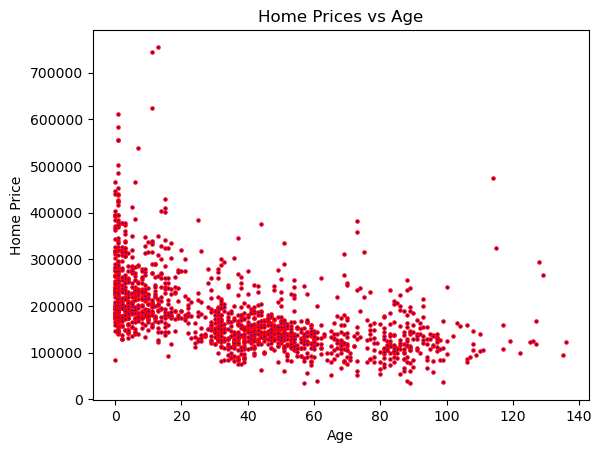

In [5]:
# Scatterplot of Home Price by Age of Home

y_values = housing_df['SalePrice']
x_values = housing_df['Age']
plt.scatter(x_values,y_values, c ="blue", linewidths = 1, marker ="o", edgecolor ="red", s = 5)
plt.title('Home Prices vs Age')
plt.ylabel('Home Price')
plt.xlabel('Age')

correlation = stats.pearsonr(x_values, y_values)
print(f"The correlation is: {correlation}")
plt.show()

In [6]:
# Home prices by the year Sold
housing_df.groupby(['BedroomAbvGr']).agg({'SalePrice':['mean','median','std','min', 'max']})

SalePrice                                      
                   mean     median        std     min     max
BedroomAbvGr                                                 
0            221,493.17 202,500.00 106,675.89  108959  385000
1            173,162.42 145,250.00 102,975.07   35311  501837
2            158,197.66 137,250.00  78,197.11   34900  611657
3            181,056.87 169,945.00  63,793.92   40000  451950
4            220,421.25 193,500.00 109,510.52   64500  755000
5            180,819.05 161,500.00  68,472.48   81000  320000
6            143,779.00 141,000.00  26,455.38  119000  200000
8            200,000.00 200,000.00        NaN  200000  200000

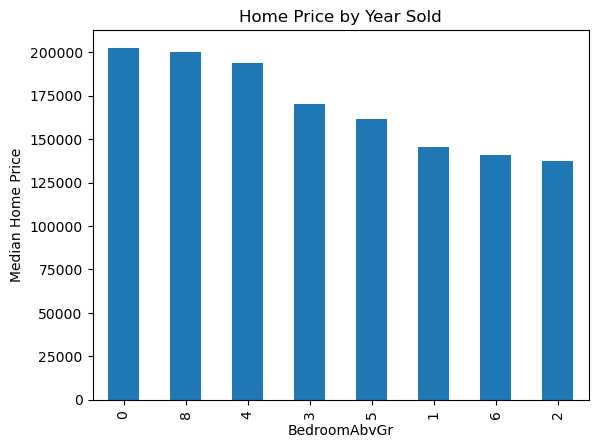

In [7]:
# Median Home Price by year it was sold
bedroom = housing_df.groupby(['BedroomAbvGr'])
group0 = bedroom['SalePrice'].median().sort_values(ascending=False)
price_chart0 = group0.plot(kind='bar', title ='Home Price by Year Sold')
plt.ylabel('Median Home Price')
plt.show()

In [8]:
# Home prices by Overall Condition
housing_df.groupby(['OverallCond']).agg({'SalePrice':['mean','median','var','std','min', 'max']})

SalePrice                                                        
                  mean     median               var        std     min     max
OverallCond                                                                   
1            61,000.00  61,000.00               NaN        NaN   61000   61000
2           141,986.40  85,000.00 19,977,790,924.80 141,342.81   67000  394432
3           101,929.40  89,500.00  2,011,745,895.33  44,852.49   35311  200624
4           120,438.44 115,000.00  1,514,963,022.96  38,922.53   40000  235000
5           203,146.91 185,000.00  7,244,958,064.57  85,117.32   34900  745000
6           153,961.59 142,750.00  3,689,100,978.35  60,737.97   37900  755000
7           158,145.49 145,000.00  2,858,847,281.01  53,468.19   79900  402000
8           155,651.74 142,500.00  2,743,155,780.39  52,375.14   84500  335000
9           216,004.55 176,200.00  9,309,543,311.69  96,485.97  110500  475000

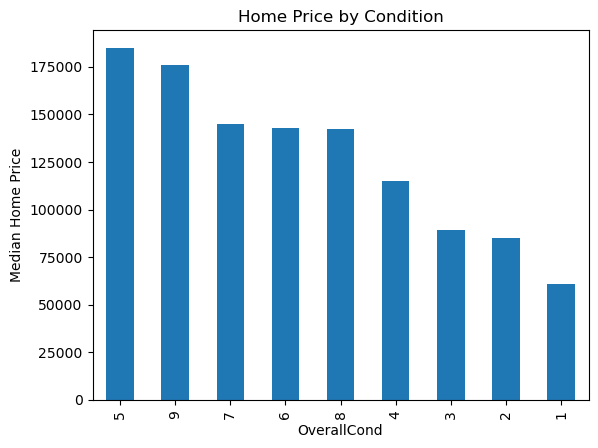

In [9]:
# Median Home Price by the overall condtion rating of the home
hse = housing_df.groupby(['OverallCond'])
group1 = hse['SalePrice'].median().sort_values(ascending=False)
price_chart1 = group1.plot(kind='bar', title ='Home Price by Condition')
plt.ylabel('Median Home Price')
plt.show()

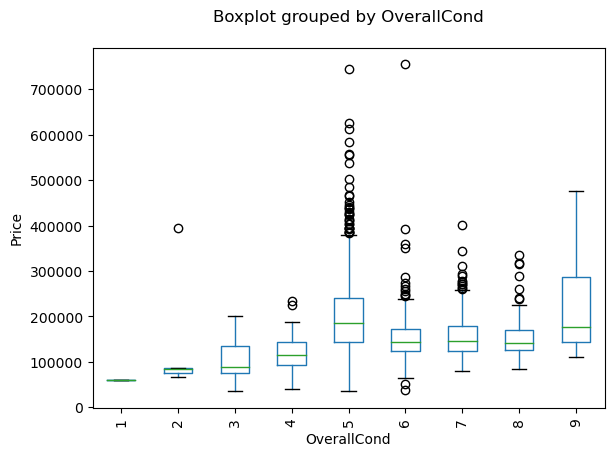

In [10]:
# Boxplot of the Price by Condtion ratiing
housing_df.boxplot(column = "SalePrice", by = "OverallCond", grid = False)
plt.xticks(rotation=90)
plt.title(" ")
plt.ylabel("Price")
plt.show()

In [11]:
# Home prices by Neighborhood
housing_df.groupby(['Neighborhood']).agg({'SalePrice':['mean','median','std','min', 'max']})

SalePrice                                      
                   mean     median        std     min     max
Neighborhood                                                 
Blmngtn      194,870.88 191,000.00  30,393.23  159895  264561
Blueste      137,500.00 137,500.00  19,091.88  124000  151000
BrDale       104,493.75 106,000.00  14,330.18   83000  125000
BrkSide      124,834.05 124,300.00  40,348.69   39300  223500
ClearCr      212,565.43 200,250.00  50,231.54  130000  328000
CollgCr      197,965.77 197,200.00  51,403.67  110000  424870
Crawfor      210,624.73 200,624.00  68,866.40   90350  392500
Edwards      128,219.70 121,750.00  43,208.62   58500  320000
Gilbert      192,854.51 181,000.00  35,986.78  141000  377500
IDOTRR       100,123.78 103,000.00  33,376.71   34900  169500
MeadowV       98,576.47  88,000.00  23,491.05   75000  151400
Mitchel      156,270.12 153,500.00  36,486.63   84500  271000
NAmes        145,847.08 140,000.00  33,075.35   87500  345000
NPkVill      142,694.44 146,000.00   9,377.31  127500  155000
NWAmes       189,050.07 182,900.00  37,172.22   82500  299800
NoRidge      335,295.32 301,500.00 121,412.66  190000  755000
NridgHt      316,270.62 315,000.00  96,392.54  154000  611657
OldTown      128,225.30 119,000.00  52,650.58   37900  475000
SWISU        142,591.36 139,500.00  32,622.92   60000  200000
Sawyer       136,793.14 135,000.00  22,345.13   62383  190000
SawyerW      186,555.80 179,900.00  55,652.00   76000  320000
Somerst      225,379.84 225,500.00  56,177.56  144152  423000
StoneBr      310,499.00 278,000.00 112,969.68  170000  556581
Timber       242,247.45 228,475.00  64,845.65  137500  378500
Veenker      238,772.73 218,000.00  72,369.32  162500  385000

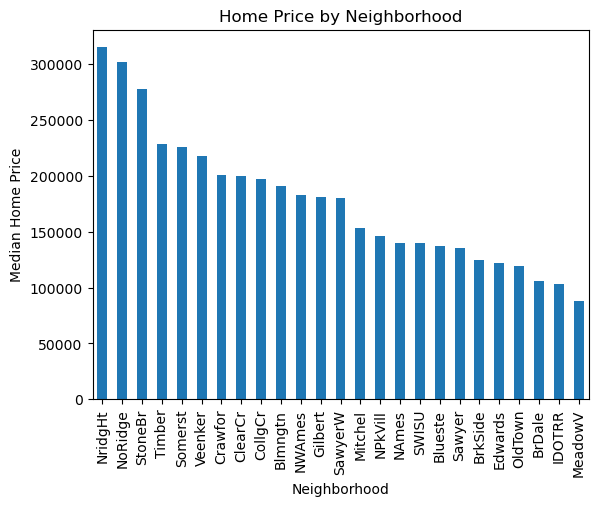

In [12]:
# Median Home Price by Neighborhood 
grp = housing_df.groupby(['Neighborhood'])
group = grp['SalePrice'].median().sort_values(ascending=False)
price_chart = group.plot(kind='bar', title ='Home Price by Neighborhood')
plt.ylabel('Median Home Price')
plt.show()

In [13]:
# Count missing/null values for each variable
housing_df.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
Utilities       0
Neighborhood    0
OverallCond     0
RoofMatl        0
Exterior1st     0
ExterCond       0
Foundation      0
TotalBsmtSF     0
CentralAir      0
GrLivArea       0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
GarageArea      0
PavedDrive      0
SaleType        0
SalePrice       0
Age             0
dtype: int64

In [14]:
# Check datatype of variables
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1460 non-null   int64 
 1   MSZoning      1460 non-null   object
 2   LotArea       1460 non-null   int64 
 3   Utilities     1460 non-null   object
 4   Neighborhood  1460 non-null   object
 5   OverallCond   1460 non-null   int64 
 6   RoofMatl      1460 non-null   object
 7   Exterior1st   1460 non-null   object
 8   ExterCond     1460 non-null   object
 9   Foundation    1460 non-null   object
 10  TotalBsmtSF   1460 non-null   int64 
 11  CentralAir    1460 non-null   object
 12  GrLivArea     1460 non-null   int64 
 13  FullBath      1460 non-null   int64 
 14  HalfBath      1460 non-null   int64 
 15  BedroomAbvGr  1460 non-null   int64 
 16  KitchenAbvGr  1460 non-null   int64 
 17  TotRmsAbvGrd  1460 non-null   int64 
 18  GarageArea    1460 non-null   int64 
 19  PavedD

In [15]:
# Get quick summary of the variables.
housing_df.describe()

,MSSubClass,LotArea,OverallCond,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,SalePrice,Age
count,"1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00"
mean,56.90,"10,516.83",5.58,"1,057.43","1,515.46",1.57,0.38,2.87,1.05,6.52,472.98,"180,921.20",36.55
std,42.30,"9,981.26",1.11,438.71,525.48,0.55,0.50,0.82,0.22,1.63,213.80,"79,442.50",30.25
min,20.00,"1,300.00",1.00,0.00,334.00,0.00,0.00,0.00,0.00,2.00,0.00,"34,900.00",0.00
25%,20.00,"7,553.50",5.00,795.75,"1,129.50",1.00,0.00,2.00,1.00,5.00,334.50,"129,975.00",8.00
50%,50.00,"9,478.50",5.00,991.50,"1,464.00",2.00,0.00,3.00,1.00,6.00,480.00,"163,000.00",35.00
75%,70.00,"11,601.50",6.00,"1,298.25","1,776.75",2.00,1.00,3.00,1.00,7.00,576.00,"214,000.00",54.00
max,190.00,"215,245.00",9.00,"6,110.00","5,642.00",3.00,2.00,8.00,3.00,14.00,"1,418.00","755,000.00",136.00


In [16]:
# Save cleaned dataframe to a cvs
# housing_df.to_csv('housing.csv',index=False)

C:\Users\rober\AppData\Local\Temp\ipykernel_20112\1535364262.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mat = housing_df.corr().round(2)


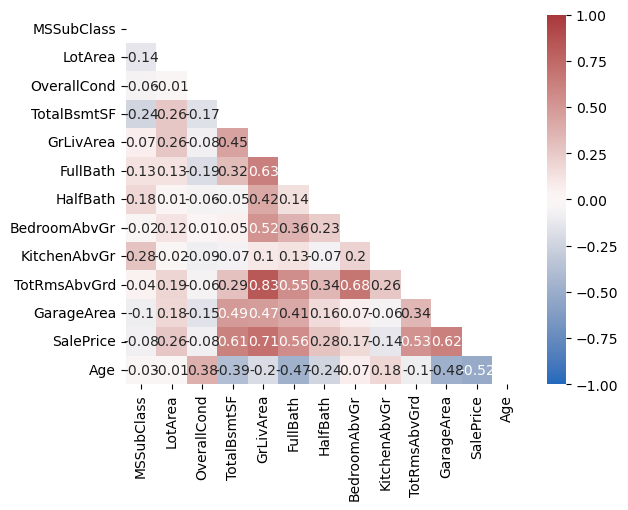

In [17]:
# Find correlation between the varaibles and plot a heatmap of the relationships
mat = housing_df.corr().round(2)
mask = np.triu(np.ones_like(mat, dtype=bool))
sns.heatmap(mat, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [18]:
# Check the kind of relationship between variables
# scatter_matrix(housing_df, alpha = 0.2, figsize = (20, 20), diagonal = 'hist')

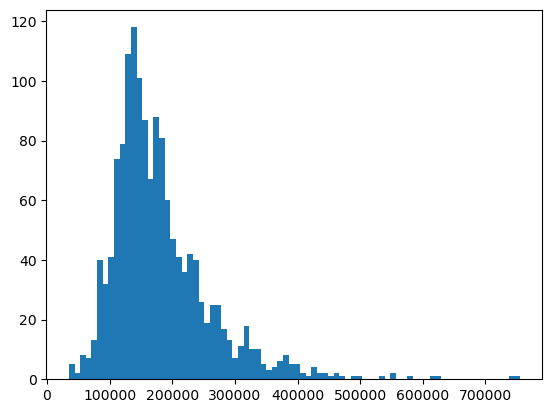

In [19]:
# Run some exploratory plots to find relationships.
plt.hist(housing_df['SalePrice'], bins=80)
plt.show()

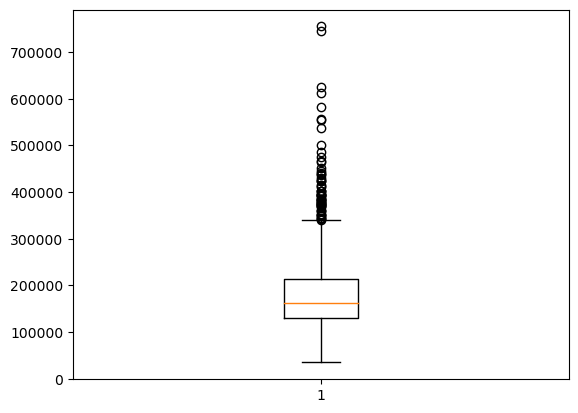

In [20]:
plt.boxplot(housing_df['SalePrice'])
plt.show()

C:\Users\rober\AppData\Local\Temp\ipykernel_20112\1649768311.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(housing_df.corr())


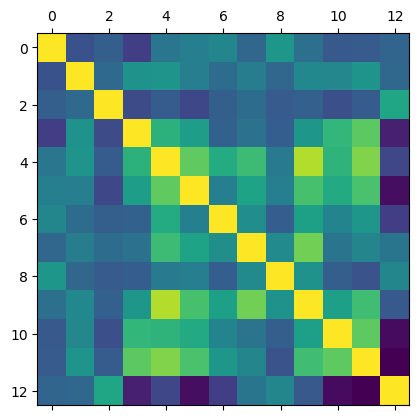

In [21]:
plt.matshow(housing_df.corr())
plt.show()

In [22]:
# Create a copy of the dataframe to use in neural networks
nn_df = housing_df.copy()
nn_df = nn_df.drop(columns=['Neighborhood'])
nn_df.head()

,MSSubClass,MSZoning,LotArea,Utilities,OverallCond,RoofMatl,Exterior1st,ExterCond,Foundation,TotalBsmtSF,CentralAir,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,PavedDrive,SaleType,SalePrice,Age
0,60,RL,8450,AllPub,5,CompShg,VinylSd,TA,PConc,856,Y,1710,2,1,3,1,8,548,Y,WD,208500,5
1,20,RL,9600,AllPub,8,CompShg,MetalSd,TA,CBlock,1262,Y,1262,2,0,3,1,6,460,Y,WD,181500,31
2,60,RL,11250,AllPub,5,CompShg,VinylSd,TA,PConc,920,Y,1786,2,1,3,1,6,608,Y,WD,223500,7
3,70,RL,9550,AllPub,5,CompShg,Wd Sdng,TA,BrkTil,756,Y,1717,1,0,3,1,7,642,Y,WD,140000,91
4,60,RL,14260,AllPub,5,CompShg,VinylSd,TA,PConc,1145,Y,2198,2,1,4,1,9,836,Y,WD,250000,8


In [23]:
# nn_df = nn_df.drop(columns='Id', axis=1)
nn_df.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Utilities', 'OverallCond',
       'RoofMatl', 'Exterior1st', 'ExterCond', 'Foundation', 'TotalBsmtSF',
       'CentralAir', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageArea', 'PavedDrive', 'SaleType',
       'SalePrice', 'Age'],
      dtype='object')

In [24]:
# Convert categorical data to numeric with `pd.get_dummies`
dummy =  nn_df.dtypes[nn_df.dtypes == "object"].index.tolist()
df_dummies = pd.get_dummies(nn_df, columns=dummy)

df_dummies.head()

,MSSubClass,LotArea,OverallCond,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,SalePrice,Age,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Utilities_AllPub,Utilities_NoSeWa,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,CentralAir_N,CentralAir_Y,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,60,8450,5,856,1710,2,1,3,1,8,548,208500,5,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,20,9600,8,1262,1262,2,0,3,1,6,460,181500,31,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,60,11250,5,920,1786,2,1,3,1,6,608,223500,7,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,70,9550,5,756,1717,1,0,3,1,7,642,140000,91,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
4,60,14260,5,1145,2198,2,1,4,1,9,836,250000,8,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1


In [25]:
# Calculate Z-values
df_dummies['price_scaled'] = np.abs(stats.zscore(df_dummies['SalePrice']))

# Filter out outliers
df_dummies = df_dummies[df_dummies['price_scaled'] <= 2.5]

# Drop the column
df_dummies = df_dummies.drop('price_scaled', axis=1)

In [26]:
df_dummies.describe()

,MSSubClass,LotArea,OverallCond,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,SalePrice,Age,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Utilities_AllPub,Utilities_NoSeWa,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,CentralAir_N,CentralAir_Y,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
count,"1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00"
mean,57.28,"10,325.43",5.59,"1,033.47","1,484.81",1.55,0.37,2.86,1.05,6.44,463.19,"173,066.06",37.33,0.01,0.05,0.01,0.78,0.15,1.00,0.00,0.00,0.98,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.03,0.00,0.04,0.15,0.00,0.15,0.08,0.00,0.02,0.35,0.14,0.02,0.00,0.02,0.10,0.00,0.88,0.10,0.44,0.43,0.02,0.00,0.00,0.07,0.93,0.06,0.02,0.92,0.03,0.00,0.00,0.01,0.00,0.00,0.07,0.00,0.88
std,42.65,"9,899.16",1.11,413.12,486.66,0.54,0.50,0.81,0.22,1.56,206.86,"63,183.89",30.10,0.08,0.21,0.11,0.41,0.36,0.03,0.03,0.03,0.13,0.03,0.03,0.03,0.09,0.06,0.05,0.12,0.03,0.04,0.18,0.03,0.19,0.36,0.03,0.36,0.27,0.04,0.13,0.48,0.35,0.13,0.05,0.14,0.30,0.03,0.33,0.30,0.50,0.50,0.13,0.06,0.05,0.25,0.25,0.24,0.14,0.28,0.17,0.05,0.04,0.08,0.05,0.06,0.25,0.05,0.32
min,20.00,"1,300.00",1.00,0.00,334.00,0.00,0.00,0.00,0.00,2.00,0.00,"34,900.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,20.00,"7,500.00",5.00,792.75,"1,122.75",1.00,0.00,2.00,1.00,5.00,318.75,"129,000.00",8.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
50%,50.00,"9,362.00",5.00,978.50,"1,443.50",2.00,0.00,3.00,1.00,6.00,473.00,"160,000.00",36.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
75%,70.00,"11,376.25",6.00,"1,261.25","1,740.50",2.00,1.00,3.00,1.00,7.00,576.00,"207,125.00",55.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
max,190.00,"215

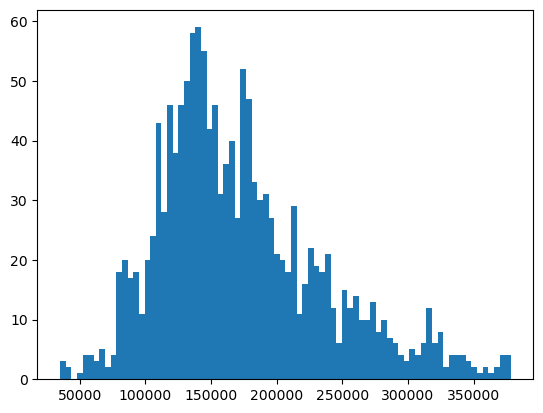

In [27]:
plt.hist(df_dummies['SalePrice'], bins=80)
plt.show()

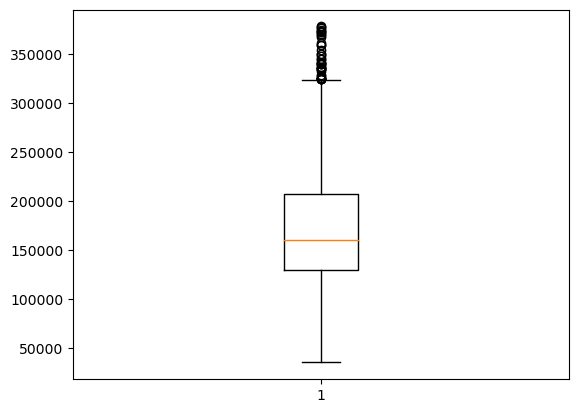

In [28]:
plt.boxplot(df_dummies['SalePrice'])
plt.show()

In [29]:
# Split our preprocessed data into our features and target arrays
y = df_dummies['SalePrice'].values
X = df_dummies.drop(['SalePrice'],axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

In [30]:
y_train.min()

34900

In [31]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [32]:
X_test_scaled[:5]

array([[ 5.19779709e-02,  5.34795681e-02, -5.48480834e-01,
         2.30974642e-03,  1.22113085e+00,  8.46283224e-01,
         1.24507764e+00,  1.88391011e-01, -2.08416888e-01,
         1.00590286e+00,  1.84262470e+00, -1.20035341e+00,
        -8.42151921e-02,  4.81354472e+00, -1.11703708e-01,
        -1.89225927e+00, -4.32484499e-01,  2.96826089e-02,
        -2.96826089e-02, -2.96826089e-02,  1.26886480e-01,
        -2.96826089e-02, -2.96826089e-02, -2.96826089e-02,
        -8.93633203e-02, -5.94438298e-02, -2.96826089e-02,
        -1.19522861e-01, -2.96826089e-02, -4.19960526e-02,
        -1.91040180e-01, -2.96826089e-02, -2.00731264e-01,
        -4.25291877e-01, -2.96826089e-02, -4.28174419e-01,
        -2.73385862e-01, -2.96826089e-02, -1.33869888e-01,
         1.35646600e+00, -4.09295889e-01, -1.26886480e-01,
        -5.14571433e-02, -1.40529903e-01, -3.42068438e-01,
         0.00000000e+00,  3.81000381e-01, -3.37232101e-01,
        -8.89830381e-01,  1.15026448e+00, -1.33869888e-0

In [33]:
from tensorflow.keras import backend as K
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [34]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  25
hidden_nodes_layer2 = 25
hidden_nodes_layer3 = 12

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="relu"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                1700      
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 dense_2 (Dense)             (None, 12)                312       
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 2675 (10.45 KB)
Trainable params: 2675 (10.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
# Compile the model
nn.compile(loss='mse', optimizer="adam", metrics=['accuracy', rmse])

In [36]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
36/36 [==============================] - 1s 1ms/step - loss: 34141194240.0000 - accuracy: 0.0000e+00 - rmse: 184460.9219
Epoch 2/100
36/36 [==============================] - 0s 914us/step - loss: 34139353088.0000 - accuracy: 0.0000e+00 - rmse: 184254.6562
Epoch 3/100
36/36 [==============================] - 0s 886us/step - loss: 34133921792.0000 - accuracy: 0.0000e+00 - rmse: 184642.5781
Epoch 4/100
36/36 [==============================] - 0s 915us/step - loss: 34117093376.0000 - accuracy: 0.0000e+00 - rmse: 184630.8125
Epoch 5/100
36/36 [==============================] - 0s 930us/step - loss: 34073587712.0000 - accuracy: 0.0000e+00 - rmse: 184255.5625
Epoch 6/100
36/36 [==============================] - 0s 886us/step - loss: 33979459584.0000 - accuracy: 0.0000e+00 - rmse: 183897.5000
Epoch 7/100
36/36 [==============================] - 0s 858us/step - loss: 33805410304.0000 - accuracy: 0.0000e+00 - rmse: 183022.3125
Epoch 8/100
36/36 [==============================] - 0s 8

In [37]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

9/9 - 0s - loss: 1062076096.0000 - accuracy: 0.0000e+00 - rmse: 32370.3535 - 139ms/epoch - 15ms/step


ValueError: too many values to unpack (expected 2)

In [ ]:
y_pred = nn.predict(X_test)
# print(MeanSquaredError(y_test, y_pred).numpy())

# print(f'y_actual: {y_test}, y_pred:{y_pred}')
y_pred[:5]

In [ ]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
sales_cat = nn_df.dtypes[nn_df.dtypes == "object"].index.tolist()
sales_cat

In [ ]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(nn_df[sales_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(sales_cat)
encode_df.head()